In [52]:
import scipy.stats as ss
import pandas as pd
import numpy as np
from pylab import plot,show,hist


In [ ]:
1)A typist makes on average 2 mistakes per page.
What is the probability of a particular page having no errors on it?

Ans :
Poisson Distribution
lambda = 2 (mistakes per page)
X~ Poisson Distribution (n=0 lambda=2) = e^(-2) = .135


2. Components are packed in boxes of 20. The probability of a component being defective is 0.1.
What is the probability of a box containing 2 defective components?

Ans :
X~ Binomial(n=20, x =2, p=.1) = nCx * p^x *(1-p)^(n-x)  = .285

3.Patrons arrive at a local bar at a mean rate of 30 per hour.
What is the probability that the bouncer has to wait more than 3 minutes to card the next patron?

Ans:
lambda = 1.5 per 3 min
X~ Poisson Distribution(n=0, lambda = 1.5) = e^(-1.5) = .223

4.A variable is normally distributed with a mean of 120 and a standard deviation of 5. One score is randomly sampled.
What is the probability the score is above 127? Use scipy.stats.norm to perform the calculation.

Ans :
import scipy.stats as ss
We want the portion to the right so subtract from 1
X ~ Standard Normal Distribution(u=120 std=5 x=127) ( 1 - ss.norm.cdf(127,loc=120,scale=5) ) =  0.0807566

5. You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 8% of the population is 6 feet or taller.
If you wait on the sidewalk, how many people would you expect to have passed you by before you'd have a candidate to reach the jar?

Ans :
X ~ Geometric(p=.08) find the mean (1/log2(1-.08)) = 8.31 people


6.A harried passenger will be several minutes late for a scheduled 10 A.M. flight to NYC. Nevertheless, he might still make the flight, since boarding is always allowed until 10:10 A.M., and boarding is sometimes permitted up to 10:30 AM.
Assuming the extended boarding time is uniformly distributed over the above limits, find the probability that the passenger will make his flight, assuming he arrives at the boarding gate at 10:25.

Ans:
Extra time span (b-a) or 1/(10:30-10:10)
He makes the fight if it is in the (10:25 to 10:30) time span (10:30- 10:25)
1/b-a * (1-(b-x))
(1/20)*5 = 0.25



In [6]:
# 

1 - ss.norm.cdf(127,loc=120,scale=5)

0.080756659233771066

In [10]:
df = pd.read_csv('data/admissions.csv')
df.head(4)

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61
3,53759.0,3.39,62


In [25]:
#self made funct to get covarance
def cov1(x,y):
    avex=np.mean(x)
    avey=np.mean(y)
   
    tot =0.0
    
    for xi,yi in zip(x,y):
        tot+=(xi-avex)*(yi-avey)
        
    return tot/(len(x)-1)


In [31]:
x = 2
x**2
np.sqrt(x)

1.4142135623730951

In [33]:
# 
def corr1(x,y):
    avex=np.mean(x)
    avey=np.mean(y)
   
    num =0.0
    denomx = 0.0
    denomy = 0.0
    
    for xi,yi in zip(x,y):
        num+=(xi-avex)*(yi-avey)
        denomx += (xi-avex)**2
        denomy += (yi-avey)**2
    
    return num / np.sqrt(denomx*denomy)
    

In [34]:
fi = df['family_income']
gpa = df['gpa']
paa = df['parent_avg_age']

In [35]:
print "Covariance of family income and gpa", cov1(fi, gpa)
print "Covariance of parents average age and gpa", cov1(paa, gpa)
print "Covariance of family income and parents average age", cov1(fi, paa)

Covariance of family income and gpa 4015.29908503
Covariance of parents average age and gpa -0.0287852599262
Covariance of family income and parents average age -1226.32627973


In [36]:
#covarance for data frame 
df.cov()

,family_income,gpa,parent_avg_age
family_income,3.329410e+08,4015.299085,-1226.326280
gpa,4.015299e+03,0.087891,-0.028785
parent_avg_age,-1.226326e+03,-0.028785,112.977442


In [39]:
print "Correlation of family income and gpa", corr1(fi, gpa)
print "Correlation of parents average age and gpa", corr1(paa, gpa)
print "Correlation of family income and parents average age", corr1(fi, paa)

Correlation of family income and gpa 0.742269390204
Correlation of parents average age and gpa -0.00913485396451
Correlation of family income and parents average age -0.0063230482719


In [40]:
df.corr()

,family_income,gpa,parent_avg_age
family_income,1.000000,0.742269,-0.006323
gpa,0.742269,1.000000,-0.009135
parent_avg_age,-0.006323,-0.009135,1.000000


In [49]:
%matplotlib inline
df_low_income = df[df['family_income']<26832]
df_mid_income = df[(df['family_income']>26832) & (df['family_income'] < 37510)]
df_high_income = df[df['family_income']>37510 ]



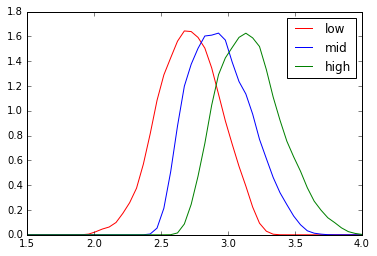

In [65]:
#how to make a histagram 

gpa_low_hist = np.hstack(df_low_income['gpa'])
low_income_pdf = ss.kde.gaussian_kde(gpa_low_hist)

gpa_mid_hist = np.hstack(df_mid_income['gpa'])
mid_income_pdf = ss.kde.gaussian_kde(gpa_mid_hist)

gpa_high_hist = np.hstack(df_high_income['gpa'])
high_income_pdf = ss.kde.gaussian_kde(gpa_high_hist)


x = np.linspace(1.5,4)


#plot in frame 111
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,low_income_pdf(x),'r',label = 'low')# distribution function
ax. plot(x,mid_income_pdf(x),'b', label = 'mid')
ax.plot(x,high_income_pdf(x),'g', label = 'high')

ax.legend()
#hist(gpa_low_hist,normed=1,alpha=.3) # histogram
show()



In [72]:
print "90 percentile GPA for low income is", np.percentile(df_low_income['gpa'],90)
print "90 percentile GPA for mid income is", np.percentile(df_mid_income['gpa'],90)
print "90 percentile GPA for high income is", np.percentile(df_high_income['gpa'],90)

90 percentile GPA for low income is 3.004
90 percentile GPA for mid income is 3.26
90 percentile GPA for high income is 3.49


In [74]:
df2 = pd.read_csv('data/admissions_with_study_hrs_and_sports.csv')
df2.head(2)

,family_income,gpa,family_income_cat,parent_avg_age,hrs_studied,sport_performance
0,31402.0,3.18,medium,32,49.463745,0.033196
1,32247.0,2.98,medium,48,16.414467,0.000317


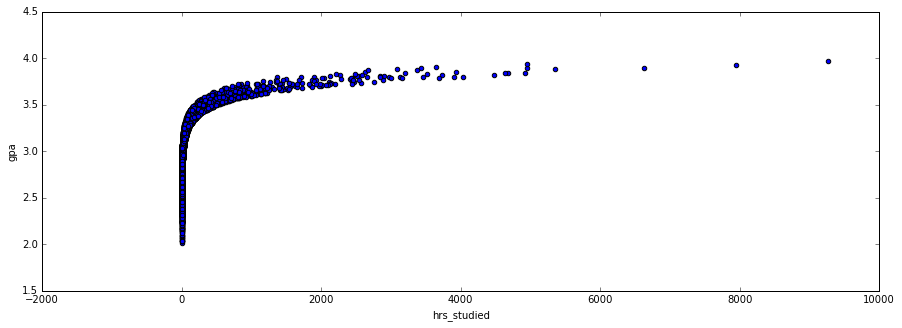

In [85]:
#plt.rcParams['figure.figsize'] = (15, 5)

df2[['gpa','hrs_studied']].plot(kind='scatter', x='hrs_studied', y='gpa')

In [90]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df2['hrs_studied'], df2['gpa'])
print slope, intercept, r_value, p_value, std_err


0.000458235267961 2.96056387232 0.475940264662 0.0 8.07722172092e-06


In [91]:
print "pearson corr coeff", ss.pearsonr(df2['hrs_studied'], df2['gpa'])
print ss.spearmanr(df2['hrs_studied'], df2['gpa'])

pearson corr coeff (0.47594026466221012, 0.0)
SpearmanrResult(correlation=0.98495916559333363, pvalue=0.0)


In [114]:
#get list of random numbers from 5000 to 6000 that is uniformaly distributed (last field is number of random)
num_views=np.random.randint(5000,6000,100)
profit_per =(.2*50+(1-.2)*60)
# we need the binomial for 12% sucess so put it through the binomial random witht the number of views mult by constant
#profit_per get list of random profits
profits =[np.random.binomial(n,.12)*profit_per for n in num_views]

profit_series = pd.Series([np.random.binomial(n,.12)*profit_per for n in num_views])

#print profit

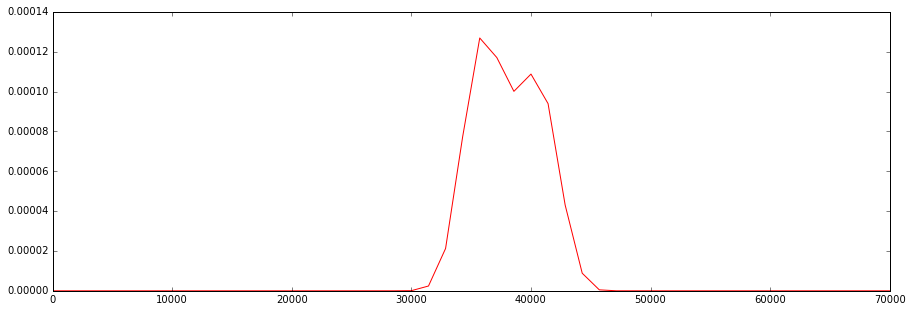

In [115]:
profit_hist = np.hstack(profit_series)
profit_pdf = ss.kde.gaussian_kde(profit_hist)

x = np.linspace(0,70000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,profit_pdf(x),'r')# distribution function



#hist(gpa_low_hist,normed=1,alpha=.3) # histogram
show()


In [116]:
np.percentile(profit_series,95)

42174.699999999997

In [111]:
# repeat above for 'better fit' by doing more random tests

#get list of random numbers from 5000 to 6000 that is uniformaly distributed (last field is number of random)
num_views=np.random.randint(5000,6000,10000)
profit_per =(.2*50+(1-.2)*60)
# we need the binomial for 12% sucess so put it through the binomial random witht the number of views mult by constant
#profit_per get list of random profits
profits =[np.random.binomial(n,.12)*profit_per for n in num_views]

profit_series = pd.Series([np.random.binomial(n,.12)*profit_per for n in num_views])

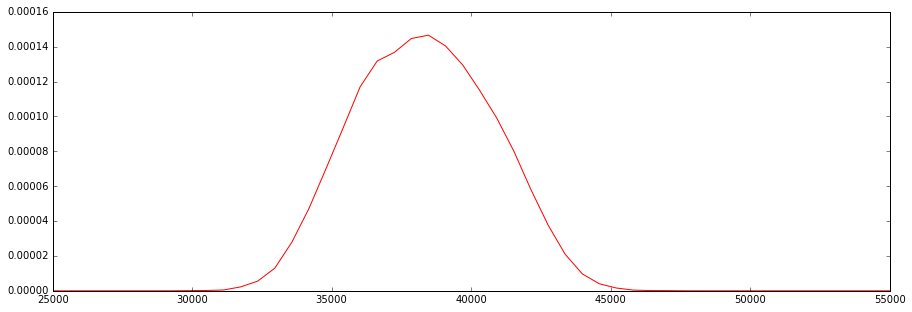

In [112]:
profit_hist = np.hstack(profit_series)
profit_pdf = ss.kde.gaussian_kde(profit_hist)

x = np.linspace(25000,55000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,profit_pdf(x),'r')# distribution function



#hist(gpa_low_hist,normed=1,alpha=.3) # histogram
show()

In [113]:
np.percentile(profit_series,95)

42340.0